In [1]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#data preprocessing
df.shape

(400, 5)

In [5]:
#checking for nan value
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [8]:
#droping the columns
df.drop("User ID",axis=1,inplace=True)

**Splitting the dataset into the Training set and Test set**

In [9]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [11]:
scaler = StandardScaler()
model = scaler.fit(x_train)
model1=scaler.fit(x_test)
x_train= model.transform(x_train)
x_test= model1.transform(x_test)

**Fitting K-NN to the Training set**

In [12]:
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
model2.score(x_test,y_test)

0.9

**Predicting the Test set results**

In [14]:
predicted=model2.predict(x_test)

**Making the Confusion Matrix**

In [15]:
from sklearn import metrics

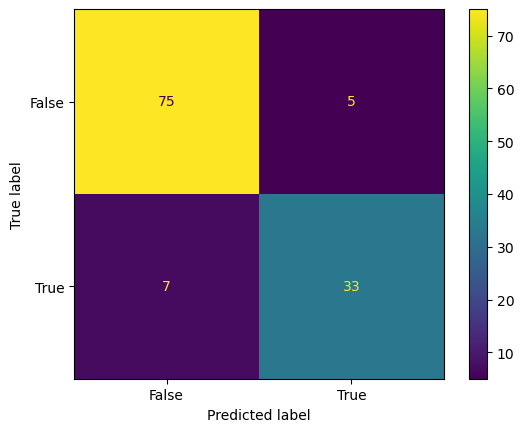

In [16]:
confusion_matric= metrics.confusion_matrix(y_test,predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matric, display_labels = [False, True])

cm_display.plot()
plt.show()